In [1]:
# install.packages(c("tidyverse", "skimr", "janitor", "psych", "GGally", "car", "broom", "lmtest", "sandwich", 'gridExtra'))


## Leo Dataset

In [2]:
library(tidyverse)
install.packages("GGally")
library(GGally)
library(broom)
install.packages("lmtest")
library(lmtest)
#library(sandwich)
library(dplyr)
install.packages("ggeffects")
library(ggeffects)
install.packages("stargazer")
library(stargazer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is

In [3]:
df <- read.csv(file = "https://infra.datos.gob.ar/catalog/sedronar/dataset/5/distribution/5.1/download/base-hogares-2022.csv", sep = ';')
head(df)

,ID_PER,WPER,CANT_MIEMBROS_HOGAR,CANT_PERSONAS0A17,CLIMA_EDUCATIVO,J_SEXO,J_EDAD,J_NIVEL_EDUCATIVO,SEXO_SEL,EDAD_SEL,⋯,ID_06B,ID_06C,ID_06D,ID_06E,ID_06F,ID_06G,ID_06H,ID_06I,ID_07,ID_08
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,336578,124,1,0,2,1,27,4,1,27,⋯,4,2,2,1,1,99,2,3,1,98
2,305909,781,1,0,3,1,33,6,1,33,⋯,2,2,1,3,2,3,2,4,2,NA
3,358892,34193,4,1,2,1,43,4,2,19,⋯,1,2,2,4,2,4,2,2,2,NA
4,342664,968,1,0,3,2,51,6,2,51,⋯,1,4,4,1,1,1,1,1,2,NA
5,394688,11509,2,0,3,2,59,5,1,31,⋯,2,1,1,2,2,4,2,2,2,NA
6,370155,13159,2,0,3,2,44,5,2,44,⋯,1,99,1,1,1,2,1,1,1,98


### Dimensiones

In [4]:
paste("Cantidad de filas:", nrow(df))
paste("Cantidad de columnas:", length(df))

[1] "Cantidad de filas: 12062"

[1] "Cantidad de columnas: 562"

## Transformaciones

### Recategorización

 Reordeno factores eliminando y usando los incompletos dado que inclueyen los niveles anteriores.

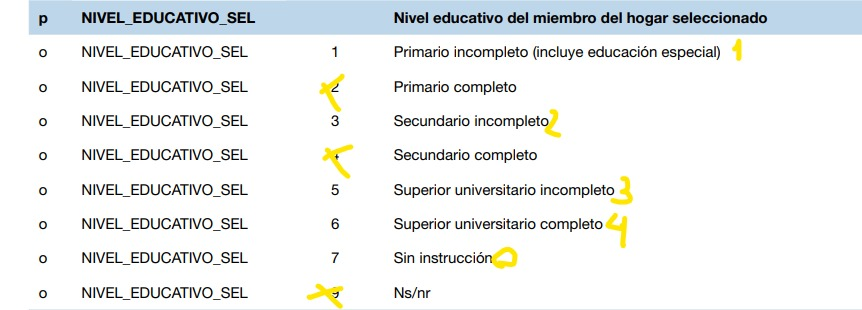

In [5]:
df <- df %>%
  # 1. Eliminar filas con valores 2, 4 y 9
  filter(!NIVEL_EDUCATIVO_SEL %in% c(2, 4, 9)) %>%

  # 2. Recodificar valores
  mutate(NIVEL_EDUCATIVO_SEL = case_when(
    NIVEL_EDUCATIVO_SEL == 7 ~ 0,
    NIVEL_EDUCATIVO_SEL == 1 ~ 1,
    NIVEL_EDUCATIVO_SEL == 3 ~ 2,
    NIVEL_EDUCATIVO_SEL == 5 ~ 3,
    NIVEL_EDUCATIVO_SEL == 6 ~ 4,
    TRUE ~ NA_real_  # por si aparece algún valor no esperado
  ))

#Sanity check
df %>% count(NIVEL_EDUCATIVO_SEL)



df <- df %>%
  # 2. Recodificar valores
  mutate(AL_01 = case_when(
    AL_01 == 2 ~ 0,
    AL_01 == 1 ~ 1,
    TRUE ~ 0  # por si aparece algún valor no esperado
  ))

#Sanity check
df %>% count(AL_01)

df <- df %>%
  # 2. Recodificar valores
  mutate(AL_04 = case_when(
    AL_04 == 2 ~ 0,
    AL_04 == 1 ~ 1,
    TRUE ~ 0  # por si aparece algún valor no esperado
  ))

#Sanity check
df %>% count(AL_04)

df <- df %>%
  # 2. Recodificar valores
  mutate(AL_16 = case_when(
    AL_16 == 1 ~ 0,
    AL_16 == 2 ~ 0,
    AL_16 == 3 ~ 0,
    AL_16 == 4 ~ 1,
    AL_16 == 5 ~ 1,
    AL_16 == 6 ~ 1,
    AL_16 == 7 ~ 0,
    AL_16 == 8 ~ 0,
    TRUE ~ 0  # por si aparece algún valor no esperado
  ))

#Sanity check
df %>% count(AL_16)


NIVEL_EDUCATIVO_SEL,n
<dbl>,<int>
0,63
1,518
2,2235
3,2050
4,2466


AL_01,n
<dbl>,<int>
0,1212
1,6120


AL_04,n
<dbl>,<int>
0,2454
1,4878


AL_16,n
<dbl>,<int>
0,6411
1,921


### Gráficos Alcohol

Warning message:
“Removed 17316 rows containing non-finite outside the scale range
(`stat_bin()`).”


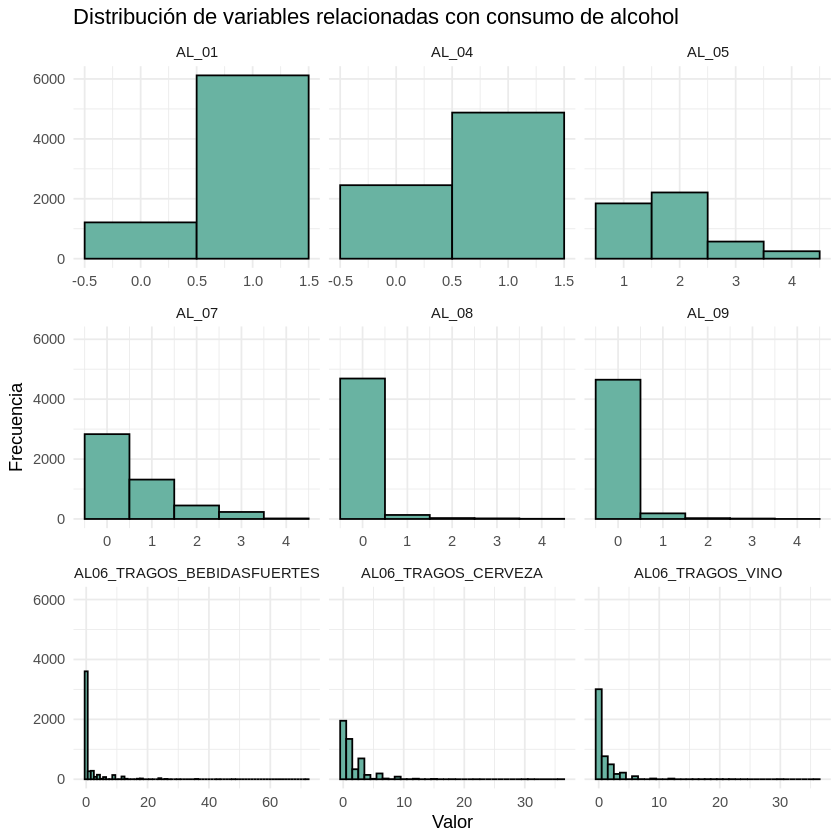

In [6]:
#Distribucion de variables relacionadas al alcohol antes de crear el indice.

library(dplyr)
library(tidyr)
library(ggplot2)
library(stringr)

# ---- FUNCIONES DE LIMPIEZA ----
# Convertir comas a punto y numeric
clean_numeric <- function(x) {
  if (is.character(x)) {
    x <- str_replace_all(x, ",", ".")
  }
  as.numeric(x)
}

# Reemplazar valores de "No contesta / No sabe / No recuerda" por NA
recode_missing <- function(x) {
  na_if(na_if(na_if(na_if(x, 98), 99), 998), 999)
}

# ---- VARIABLES RELACIONADAS CON ALCOHOL ----
alcohol_vars <- c(
  "AL_01", "AL_04", "AL_05",
  "AL_07", "AL_08", "AL_09",
  "AL06_TRAGOS_CERVEZA", "AL06_TRAGOS_VINO", "AL06_TRAGOS_BEBIDASFUERTES"
)

# ---- LIMPIEZA Y TRANSFORMACIÓN ----
df_alcohol <- df %>%
  select(all_of(alcohol_vars)) %>%
  mutate(across(everything(), clean_numeric)) %>%
  mutate(across(everything(), recode_missing))

# ---- PREPARAR PARA GRAFICOS ----
# Convertir de wide a long
df_long <- df_alcohol %>%
  pivot_longer(cols = everything(), names_to = "variable", values_to = "valor")

# ---- GRAFICO CON FACETAS ----
p_alcohol <- ggplot(df_long, aes(x = valor)) +
  geom_histogram(binwidth = 1, fill = "#69b3a2", color = "black") +
  facet_wrap(~variable, scales = "free_x") +
  labs(
    title = "Distribución de variables relacionadas con consumo de alcohol",
    x = "Valor",
    y = "Frecuencia"
  ) +
  theme_minimal()

# ---- MOSTRAR GRAFICO ----
p_alcohol

### Gráficos Eventos sociales

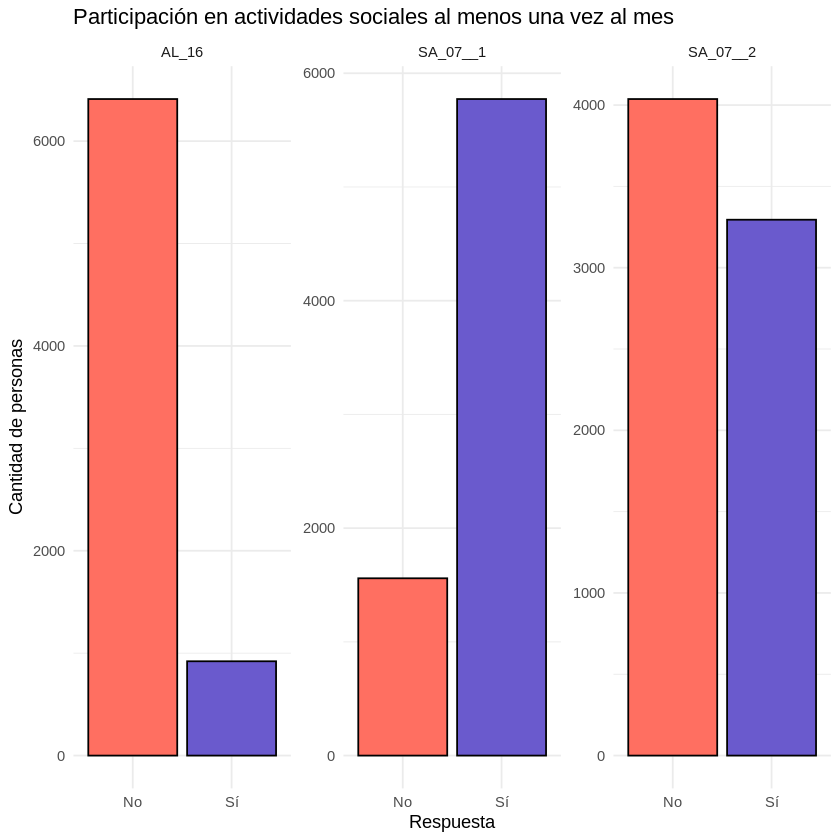

In [7]:

# Idem para eventos sociales


library(dplyr)
library(tidyr)
library(ggplot2)

# ---- VARIABLES DE EVENTOS SOCIALES ----
social_vars <- c("SA_07__1", "SA_07__2", "AL_16")

# ---- LIMPIEZA Y TRANSFORMACIÓN ----
df_social <- df %>%
  select(all_of(social_vars)) %>%
  mutate(across(everything(), ~na_if(.x, 99)))  # suponer 99 = No contesta

# ---- PREPARAR PARA GRAFICOS ----
# Convertir de wide a long
df_long_social <- df_social %>%
  pivot_longer(cols = everything(), names_to = "variable", values_to = "valor") %>%
  mutate(valor = factor(valor, levels = c(0,1), labels = c("No", "Sí")))

# ---- GRAFICO CON FACETAS ----
p_social <- ggplot(df_long_social, aes(x = valor, fill = valor)) +
  geom_bar(color = "black") +
  facet_wrap(~variable, scales = "free_y") +
  labs(
    title = "Participación en actividades sociales al menos una vez al mes",
    x = "Respuesta",
    y = "Cantidad de personas"
  ) +
  theme_minimal() +
  scale_fill_manual(values = c("No" = "#FF6F61", "Sí" = "#6A5ACD")) +
  theme(legend.position = "none")

# ---- MOSTRAR GRAFICO ----
p_social


### Creación de Índices

In [8]:
# ---- VARIABLES ----
social_vars <- c("SA_07__1", "SA_07__2", "AL_16")
alcohol_vars <- c(
  "AL_01", "AL_04", "AL_05",
  "AL_07", "AL_08", "AL_09",
  "AL06_TRAGOS_CERVEZA", "AL06_TRAGOS_VINO", "AL06_TRAGOS_BEBIDASFUERTES"
)

# ---- Filtrar solo columnas existentes en df ----
social_vars <- social_vars[social_vars %in% names(df)]
alcohol_vars <- alcohol_vars[alcohol_vars %in% names(df)]

# ---- Reemplazar códigos de no respuesta por NA y convertir a numérico ----
df[social_vars] <- lapply(df[social_vars], function(x) {
  x <- as.numeric(as.character(x))
  x[x %in% c(99,998,999)] <- 0
  return(x)
})

df[alcohol_vars] <- lapply(df[alcohol_vars], function(x) {
  x <- as.numeric(as.character(x))
  x[x %in% c(99,998,999)] <- 0
  return(x)
})

# ---- Crear índices ----
df$INDICE_SOCIALES <- rowSums(df[social_vars], na.rm = TRUE)
df$INDICE_ALCOHOL <- rowSums(df[alcohol_vars], na.rm = TRUE)

# ---- Revisar las primeras filas ----
head(df[, c("NIVEL_EDUCATIVO_SEL", "INDICE_SOCIALES", "INDICE_ALCOHOL")])

#Sanity check
df %>% count(INDICE_SOCIALES)
df %>% count(INDICE_ALCOHOL)


Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”


,NIVEL_EDUCATIVO_SEL,INDICE_SOCIALES,INDICE_ALCOHOL
,<dbl>,<dbl>,<dbl>
1,4,1,9
2,4,1,5
3,3,2,7
4,3,2,4
5,3,2,13
6,2,2,12


INDICE_SOCIALES,n
<dbl>,<int>
0,1287
1,2669
2,2808
3,568


INDICE_ALCOHOL,n
<dbl>,<int>
0,1212
1,1242
3,1105
4,1225
5,548
6,501
7,331
8,257
9,105


## Modelado

In [9]:
# Cargar datos
datos <- df

# Preparación de datos
datos_freq <- datos %>%
  # 1. Filtramos solo a quienes contestaron AL_05 (Los que consumen)
  filter(!is.na(INDICE_ALCOHOL)) %>%
  mutate(
    # 2. Variable Dependiente: Frecuencia (Tratada como numérica para ver tendencia)
    # Invertimos o mantenemos el orden según te convenga.
    # En el manual: 1 es "Poco" y 4 es "Mucho". Está perfecto así.
    INDICE_ALCOHOL = as.numeric(INDICE_ALCOHOL),

    # 3. Variable Independiente: Nivel Educativo (Usamos la original del manual)
    # 1=Prim Inc, 2=Prim Comp, 3=Sec Inc, 4=Sec Comp, 5=Sup Inc, 6=Sup Comp, 7=Sin Inst
    INDICE_SOCIALES = as.numeric(INDICE_SOCIALES),

    # 4. Confusor: Edad
    edad = EDAD_SEL
  )

# --- MODELO 1: "Lo que se ve a simple vista" (Naive) ---
# ¿A mayor educación, mayor frecuencia?
modelo_naive <- lm(INDICE_ALCOHOL ~ INDICE_SOCIALES, data = datos_freq)

# --- MODELO 2: "La realidad causal" (Controlado) ---
# ¿Qué pasa cuando le quitamos el efecto de la edad?
modelo_causal <- lm(INDICE_ALCOHOL ~ INDICE_SOCIALES + edad, data = datos_freq)


### DAG 1: Modelo ingenuo

In [10]:
# # Mostrar resultados
cat("Modelo ingenuo")
summary(modelo_naive)

Modelo ingenuo


Call:
lm(formula = INDICE_ALCOHOL ~ INDICE_SOCIALES, data = datos_freq)

Residuals:
   Min     1Q Median     3Q    Max 
-5.475 -2.878 -1.475  1.122 70.525 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.66887    0.11319   23.58   <2e-16 ***
INDICE_SOCIALES  1.40313    0.07029   19.96   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.167 on 7330 degrees of freedom
Multiple R-squared:  0.05156,	Adjusted R-squared:  0.05143 
F-statistic: 398.5 on 1 and 7330 DF,  p-value: < 2.2e-16


### Modelo Complejo

In [11]:
cat("Modelo complejo")
summary(modelo_causal)

Modelo complejo


Call:
lm(formula = INDICE_ALCOHOL ~ INDICE_SOCIALES + edad, data = datos_freq)

Residuals:
   Min     1Q Median     3Q    Max 
-6.418 -2.912 -1.148  1.209 69.626 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.843921   0.220116   22.01   <2e-16 ***
INDICE_SOCIALES  1.137909   0.073399   15.50   <2e-16 ***
edad            -0.043849   0.003818  -11.48   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.122 on 7329 degrees of freedom
Multiple R-squared:  0.06833,	Adjusted R-squared:  0.06807 
F-statistic: 268.7 on 2 and 7329 DF,  p-value: < 2.2e-16


### Gráficos

[1] "Registros válidos para el análisis: 7332"


Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_ribbon()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_line()`).”


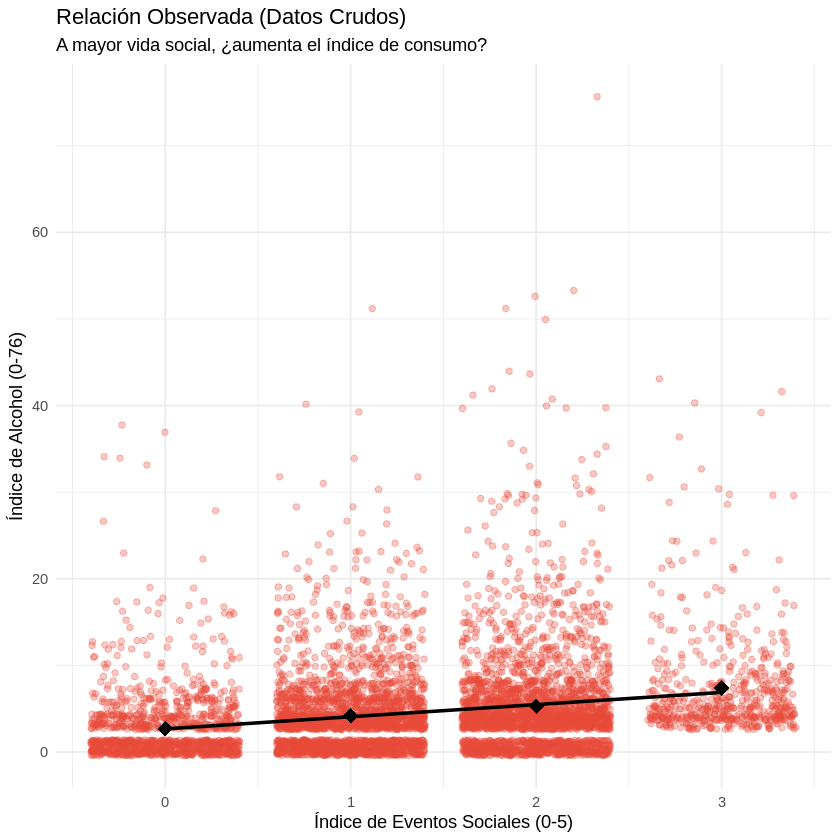

Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_ribbon()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_line()`).”


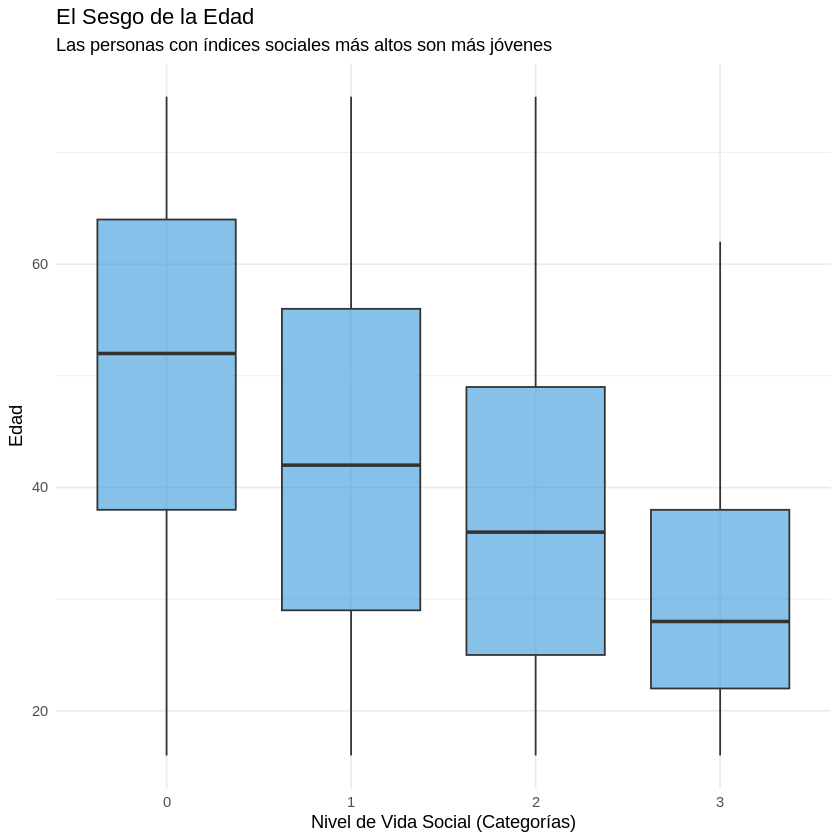

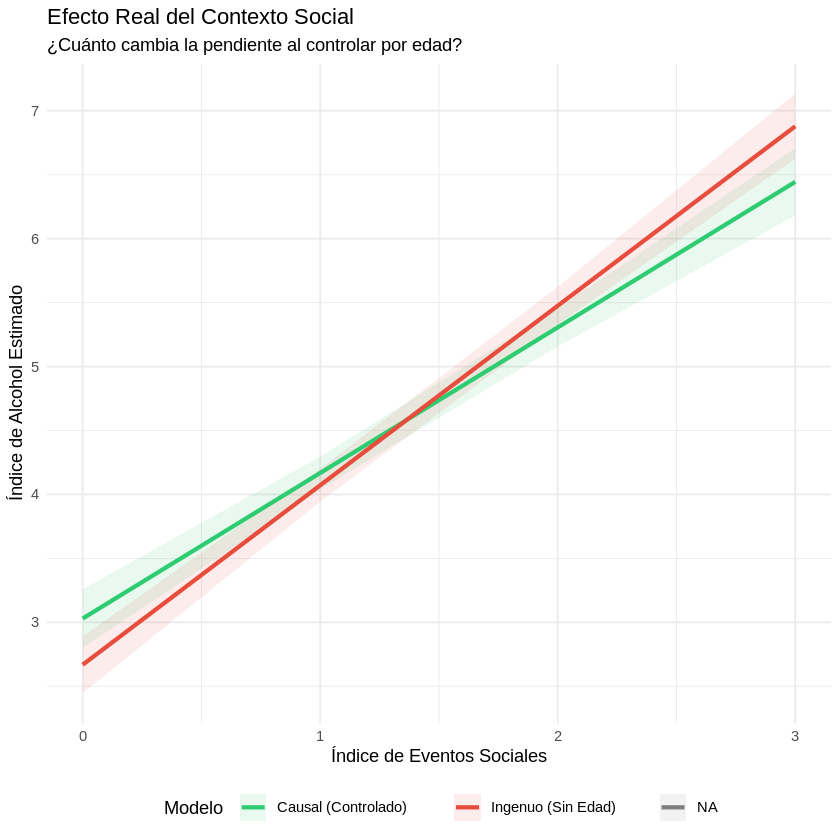

In [12]:
library(tidyverse)
library(ggeffects)

# -----------------------------------------------------------------------------
# 1. LIMPIEZA DE DATOS (El paso más importante)
# -----------------------------------------------------------------------------
# Asumimos que 'df' tiene tus variables creadas
datos_limpios <- df %>%
  select(INDICE_ALCOHOL, INDICE_SOCIALES, EDAD_SEL) %>%
  mutate(
    # Aseguramos que todo sea numérico
    INDICE_ALCOHOL = as.numeric(INDICE_ALCOHOL),
    INDICE_SOCIALES = as.numeric(INDICE_SOCIALES),
    edad = as.numeric(EDAD_SEL)
  ) %>%
  # ¡ESTA ES LA CLAVE! Elimina cualquier fila que tenga un dato faltante
  na.omit()

# Verificación rápida en consola (opcional)
print(paste("Registros válidos para el análisis:", nrow(datos_limpios)))

# -----------------------------------------------------------------------------
# 2. GRÁFICO 1: TENDENCIA OBSERVADA
# -----------------------------------------------------------------------------
grafico_naive <- ggplot(datos_limpios, aes(x = INDICE_SOCIALES, y = INDICE_ALCOHOL)) +
  # Puntos semitransparentes para ver la densidad de datos
  geom_point(alpha = 0.3, color = "#E74C3C", position = "jitter") +

  # Línea de tendencia suavizada
  geom_smooth(method = "lm", formula = y ~ x, se = TRUE, color = "black", fill = "#F1948A") +

  # Promedios (Puntos grandes negros) para ver la media por nivel social
  stat_summary(fun = mean, geom = "point", size = 4, color = "black", shape = 18) +

  labs(
    title = "Relación Observada (Datos Crudos)",
    subtitle = "A mayor vida social, ¿aumenta el índice de consumo?",
    x = "Índice de Eventos Sociales (0-5)",
    y = "Índice de Alcohol (0-76)"
  ) +
  theme_minimal()

ggsave("1_grafico_naive_final.png", plot = grafico_naive, width = 8, height = 5)


# -----------------------------------------------------------------------------
# 3. GRÁFICO 2: EL CONFUSOR (EDAD)
# -----------------------------------------------------------------------------
grafico_confusor <- ggplot(datos_limpios, aes(x = factor(INDICE_SOCIALES), y = edad)) +
  geom_boxplot(fill = "#3498DB", alpha = 0.6, outlier.shape = NA) +
  labs(
    title = "El Sesgo de la Edad",
    subtitle = "Las personas con índices sociales más altos son más jóvenes",
    x = "Nivel de Vida Social (Categorías)",
    y = "Edad"
  ) +
  theme_minimal()

ggsave("2_grafico_confusor_final.png", plot = grafico_confusor, width = 8, height = 5)


# -----------------------------------------------------------------------------
# 4. GRÁFICO 3: MODELO CAUSAL (El Veredicto)
# -----------------------------------------------------------------------------
# Corremos los modelos
m_naive <- lm(INDICE_ALCOHOL ~ INDICE_SOCIALES, data = datos_limpios)
m_causal <- lm(INDICE_ALCOHOL ~ INDICE_SOCIALES + edad, data = datos_limpios)

# Predicciones
# Usamos [all] para que calcule sobre los valores reales de tu índice social
pred_naive <- ggpredict(m_naive, terms = "INDICE_SOCIALES [all]") %>% mutate(Modelo = "Ingenuo (Sin Edad)")
pred_causal <- ggpredict(m_causal, terms = "INDICE_SOCIALES [all]") %>% mutate(Modelo = "Causal (Controlado)")

comparacion <- rbind(pred_naive, pred_causal)

grafico_final <- ggplot(comparacion, aes(x = x, y = predicted, color = Modelo)) +
  # Intervalos de confianza
  geom_ribbon(aes(ymin = conf.low, ymax = conf.high, fill = Modelo), alpha = 0.1, color = NA) +
  # Líneas de tendencia
  geom_line(linewidth = 1.2) +

  scale_color_manual(values = c("#2ECC71", "#E74C3C")) +
  scale_fill_manual(values = c("#2ECC71", "#E74C3C")) +

  labs(
    title = "Efecto Real del Contexto Social",
    subtitle = "¿Cuánto cambia la pendiente al controlar por edad?",
    x = "Índice de Eventos Sociales",
    y = "Índice de Alcohol Estimado"
  ) +
  theme_minimal() +
  theme(legend.position = "bottom")

ggsave("3_grafico_final_final.png", plot = grafico_final, width = 8, height = 5)

# Mostrar
print(grafico_naive)
print(grafico_confusor)
print(grafico_final)